# Linear Regression: Stock Price Prediction​

## Stock Price Prediction 

### Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. physhological, rational and irrational behaviour, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.​ 

## Linear Regression 

### The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.​ The equation for linear regression can be written as: Y = m1X1 + m2X2 + .. + mnXn. Here, x1, x2,….xn represent the independent variables while the coefficients θ1, θ2, …. θn  represent the weights.​ Now lets look at the implementation.​ 

# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
#np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import style
style.use('ggplot')

# Loading Data 

In [2]:
#loading the csv file into dataframe
stock=pd.read_csv("dataset.csv",index_col="Date")
stock.rename(columns={"Total Traded Quantity":"Volume"},inplace=True)#renaming the column name

# Visualize Data

In [3]:
stock.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Volume,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
01-Nov-2019,RELIANCE,EQ,1464.35,1455.0,1461.80,1441.0,1456.15,1456.90,1451.60,6356579,9.227242e+09,236195,3504112,55.13
04-Nov-2019,RELIANCE,EQ,1456.90,1465.9,1471.00,1445.1,1460.65,1457.65,1456.28,6429329,9.362883e+09,203644,3603931,56.05
05-Nov-2019,RELIANCE,EQ,1457.65,1463.1,1468.95,1441.0,1447.50,1447.30,1449.21,5799318,8.404412e+09,154824,3229832,55.69
06-Nov-2019,RELIANCE,EQ,1447.30,1442.7,1446.45,1428.5,1433.00,1434.90,1436.25,6686289,9.603195e+09,158809,3953109,59.12
07-Nov-2019,RELIANCE,EQ,1434.90,1435.0,1463.00,1432.2,1461.00,1458.60,1448.68,6438749,9.327688e+09,135012,3465630,53.82


In [4]:
#retreving the open,high,low and volume in X and closing into Y
X=stock[["Open Price","High Price","Low Price","Volume"]]
Y=stock[["Close Price"]]

In [5]:
X.head()

,Open Price,High Price,Low Price,Volume
Date,,,,
01-Nov-2019,1455.0,1461.80,1441.0,6356579
04-Nov-2019,1465.9,1471.00,1445.1,6429329
05-Nov-2019,1463.1,1468.95,1441.0,5799318
06-Nov-2019,1442.7,1446.45,1428.5,6686289
07-Nov-2019,1435.0,1463.00,1432.2,6438749


In [6]:
Y.head()

,Close Price
Date,
01-Nov-2019,1456.90
04-Nov-2019,1457.65
05-Nov-2019,1447.30
06-Nov-2019,1434.90
07-Nov-2019,1458.60


In [7]:
X.shape

(250, 4)

In [8]:
Y.shape

(250, 1)

In [9]:
X.isnull().sum()

Open Price    0
High Price    0
Low Price     0
Volume        0
dtype: int64

In [10]:
Y.isnull().sum()

Close Price    0
dtype: int64

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

Y[['Close Price']] = min_max_scaler.fit_transform(Y[['Close Price']]) 

<ipython-input-11-399d9503c478>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[['Close Price']] = min_max_scaler.fit_transform(Y[['Close Price']])
c:\users\sauravjoshi23\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
c:\users\sauravjoshi23\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [12]:
Y.head()

,Close Price
Date,
01-Nov-2019,0.397674
04-Nov-2019,0.398195
05-Nov-2019,0.391010
06-Nov-2019,0.382402
07-Nov-2019,0.398855


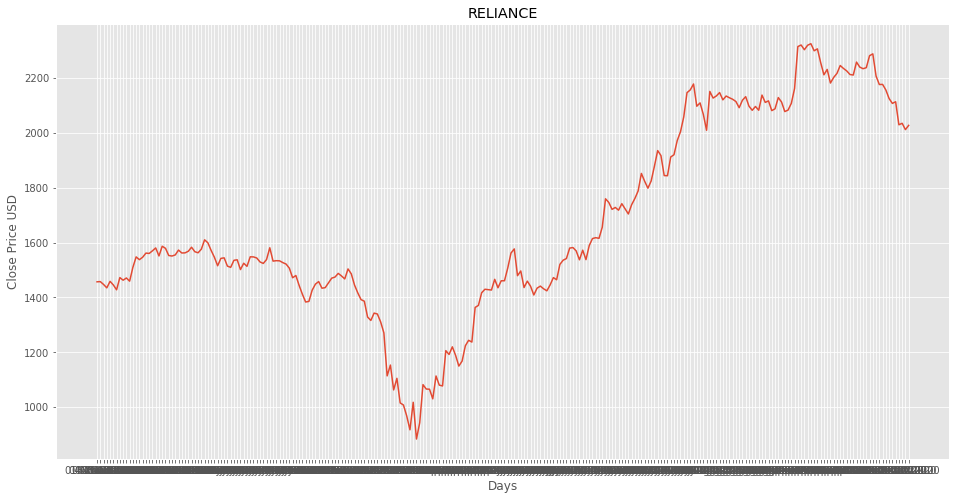

In [13]:
#Visulaize close price data
plt.figure(figsize=(16,8))
plt.title('RELIANCE')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(stock['Close Price'])
plt.show()

# Future Prediction


In [14]:
fd=20
Y['Prediction']=Y[['Close Price']].shift(-fd)

<ipython-input-14-5515f4d5dbba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Prediction']=Y[['Close Price']].shift(-fd)


In [15]:
A = np.array(Y.drop(['Prediction'],1))[:-fd]
print(A)
print(Y)

[[0.39767442]
 [0.39819507]
 [0.39101007]
 [0.38240194]
 [0.39885456]
 [0.3897605 ]
 [0.3774731 ]
 [0.40836515]
 [0.40173551]
 [0.40735856]
 [0.39927109]
 [0.43436307]
 [0.46067338]
 [0.45369663]
 [0.45987504]
 [0.4703228 ]
 [0.46942034]
 [0.47608469]
 [0.48333912]
 [0.46310309]
 [0.48764318]
 [0.48236723]
 [0.4641791 ]
 [0.46289483]
 [0.46570635]
 [0.47799375]
 [0.47060049]
 [0.47091288]
 [0.47493926]
 [0.48514405]
 [0.47382853]
 [0.47112114]
 [0.48024991]
 [0.50392225]
 [0.49639014]
 [0.47716071]
 [0.45984033]
 [0.43828532]
 [0.4569941 ]
 [0.45827838]
 [0.43734814]
 [0.43425894]
 [0.45209997]
 [0.45338424]
 [0.42863589]
 [0.44467199]
 [0.43672336]
 [0.46091635]
 [0.46067338]
 [0.45793127]
 [0.44800417]
 [0.44415134]
 [0.45390489]
 [0.48382506]
 [0.45005207]
 [0.45112808]
 [0.45074627]
 [0.44623395]
 [0.44255467]
 [0.43214162]
 [0.40798334]
 [0.41360639]
 [0.38854564]
 [0.36626171]
 [0.34661576]
 [0.3481083 ]
 [0.37650121]
 [0.39184311]
 [0.3982992 ]
 [0.38153419]
 [0.38288789]
 [0.39

In [16]:
b = np.array(Y['Prediction'])[:-fd]
print(b)

[0.48764318 0.48236723 0.4641791  0.46289483 0.46570635 0.47799375
 0.47060049 0.47091288 0.47493926 0.48514405 0.47382853 0.47112114
 0.48024991 0.50392225 0.49639014 0.47716071 0.45984033 0.43828532
 0.4569941  0.45827838 0.43734814 0.43425894 0.45209997 0.45338424
 0.42863589 0.44467199 0.43672336 0.46091635 0.46067338 0.45793127
 0.44800417 0.44415134 0.45390489 0.48382506 0.45005207 0.45112808
 0.45074627 0.44623395 0.44255467 0.43214162 0.40798334 0.41360639
 0.38854564 0.36626171 0.34661576 0.3481083  0.37650121 0.39184311
 0.3982992  0.38153419 0.38288789 0.39479347 0.40697674 0.40964943
 0.41898646 0.41249566 0.40496355 0.43023256 0.41784103 0.38937869
 0.36955918 0.35262062 0.34862895 0.30864283 0.29996529 0.31850052
 0.31631378 0.29649427 0.26862201 0.1597362  0.18708782 0.1242277
 0.1535925  0.09139188 0.08604651 0.05862548 0.02335994 0.09295384
 0.         0.04120097 0.13759111 0.12644915 0.12603263 0.10163138
 0.15945852 0.13634155 0.13425894 0.22356821 0.21388407 0.23318

In [17]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size = 0.25, random_state=0)

In [18]:
class LinearRegression() : 
      
    def __init__( self, learning_rate, iterations ) : 
          
        self.learning_rate = learning_rate 
          
        self.iterations = iterations 
          
    # Function for model training 
              
    def fit( self, X, Y ) : 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X.shape 
          
        # weight initialization 
          
        self.W = np.zeros( self.n ) 
          
        self.b = 0
          
        self.X = X 
          
        self.Y = Y 
          
          
        # gradient descent learning 
                  
        for i in range( self.iterations ) : 
              
            self.update_weights() 
              
        return self
      
    # Helper function to update weights in gradient descent 
      
    def update_weights( self ) : 
             
        Y_pred = self.predict( self.X ) 
          
        # calculate gradients   
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m 
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
          
        # update weights 
      
        self.W = self.W - self.learning_rate * dW 
      
        self.b = self.b - self.learning_rate * db 
          
        return self
      
    # Hypothetical function  h( x )  
      
    def predict( self, X ) : 
      
        return X.dot( self.W ) + self.b 

In [19]:
regressor = LinearRegression(iterations = 1000, learning_rate = 0.7)
regressor.fit(X_train, y_train)

In [20]:
x_future = Y.drop(['Prediction'], 1)[:-fd]
x_future = x_future.tail(fd)
x_future = np.array(x_future)
x_future

array([[0.85251649],
       [0.8283235 ],
       [0.8320722 ],
       [0.84904547],
       [0.886706  ],
       [0.99267615],
       [0.99666782],
       [0.98472753],
       [0.99604304],
       [1.        ],
       [0.98208955],
       [0.98691427],
       [0.95230823],
       [0.92127733],
       [0.93491843],
       [0.90048594],
       [0.91471711],
       [0.92481777],
       [0.94481083],
       [0.93738285]])

In [21]:
#Show the model linear regression prediction
lr_prediction = regressor.predict(x_future)
print(lr_prediction)

[0.85665048 0.83412347 0.83761403 0.85341848 0.88848563 0.98715843
 0.99087522 0.97975716 0.99029346 0.99397794 0.97730084 0.98179331
 0.94957033 0.92067629 0.93337803 0.90131664 0.91456782 0.92397293
 0.94258922 0.93567275]


<ipython-input-22-90a5f8014942>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


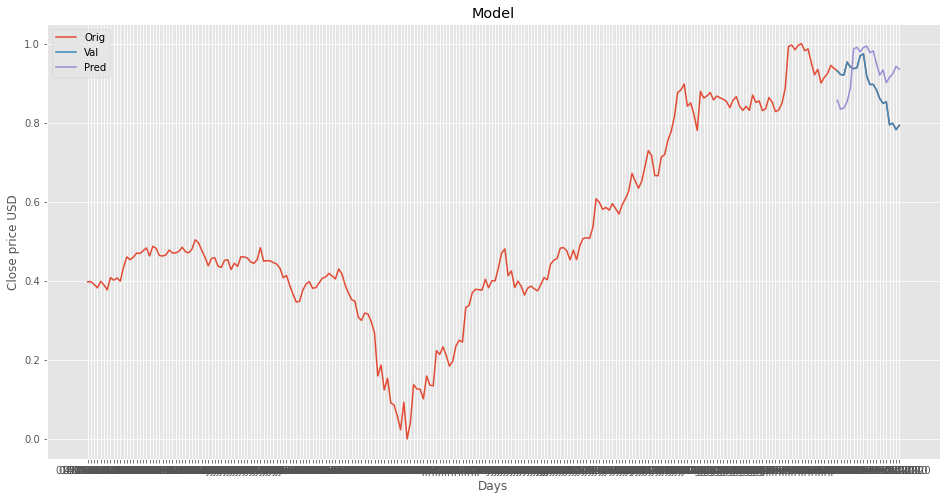

In [22]:
#Visualize the data
predictions = lr_prediction

valid = Y[A.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(Y['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

# Prediction on Train Set

In [23]:
y_pred = regressor.predict(X_train)
result = pd.DataFrame({'Actual':y_train.flatten(),'Predicted':y_pred.flatten()})#converting predicted and actual into dataframe 


#metrics to show the performance
print('R2 score:', metrics.r2_score(y_train, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2 score: 0.7037133305415451
Mean Absolute Error: 0.11037909420145882
Mean Squared Error: 0.019546954088779482
Root Mean Squared Error: 0.13981042196052296


# Prediction on Test Set

In [24]:
y_pred = regressor.predict(X_test)#predicting on the test dataset
result = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})#converting predicted and actual into dataframe 

#metrics to show the performance
print('R2 score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score: 0.6566674516079354
Mean Absolute Error: 0.11539928755015376
Mean Squared Error: 0.021416469430489672
Root Mean Squared Error: 0.14634366891153738
